# ИТ Криминалистика - Упражнение 2

**Тема: Определяне на местоположение на лице в изображение**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

import os
import numpy as np
from sklearn.datasets import load_files
from PIL import Image
import matplotlib.pyplot as plt

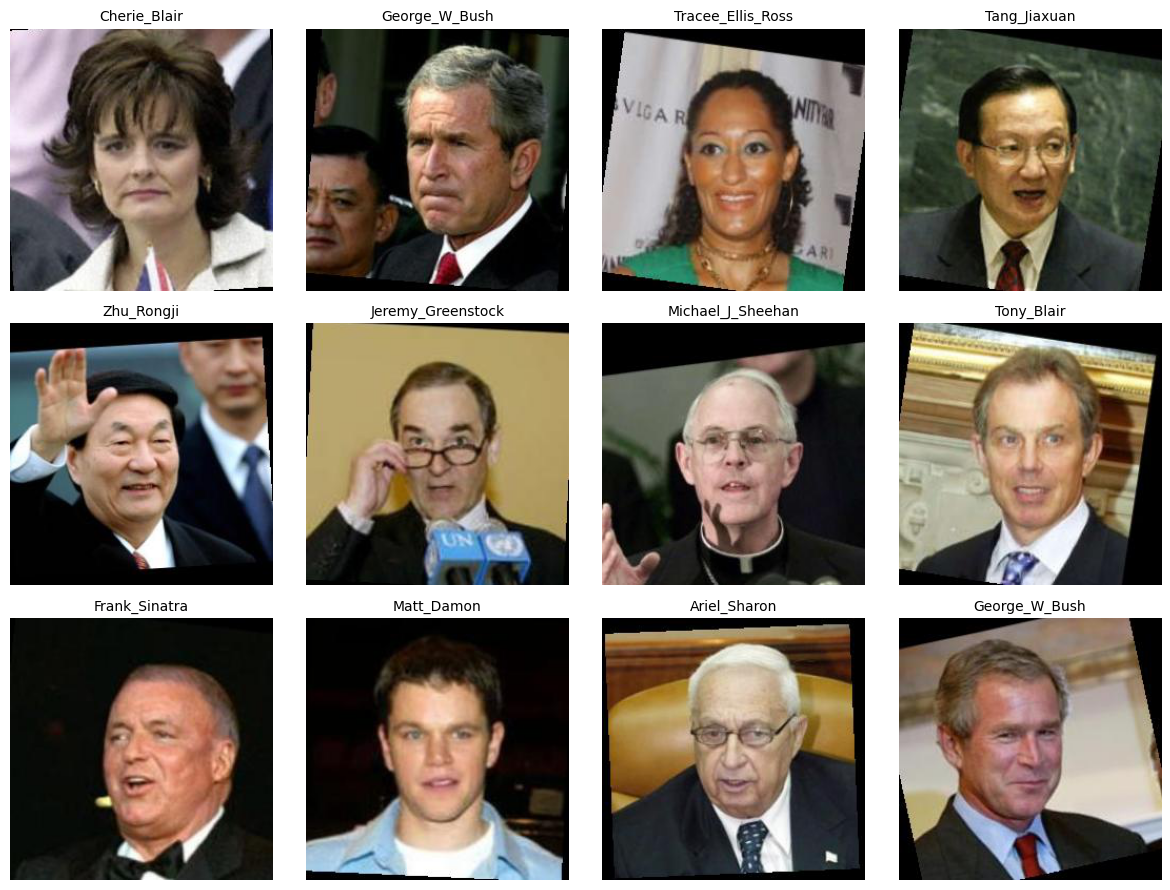

In [29]:
# Path to the dataset
dataset_path = "./archive/lfw_home/lfw-deepfunneled/lfw-deepfunneled"  # adjust this if needed

# Load dataset using sklearn's helper (it reads subfolders as class names)
data = load_files(dataset_path, load_content=False)
file_paths = np.array(data['filenames'])
targets = np.array(data['target'])
target_names = np.array(data['target_names'])

# Display 12 sample faces
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    img = Image.open(file_paths[i])
    ax.imshow(img)
    ax.set_title(target_names[targets[i]], fontsize=10)
    ax.axis('off')
plt.tight_layout()
plt.show()

🧾 Dataset Summary:
- Total images: 13233
- Total people: 5749
- Avg images per person: 2.30
- Min images per person: 1
- Max images per person: 530
- Sample image sizes (from first 100):
  - Avg: (250.0, 250.0)
  - Min: (250, 250)
  - Max: (250, 250)


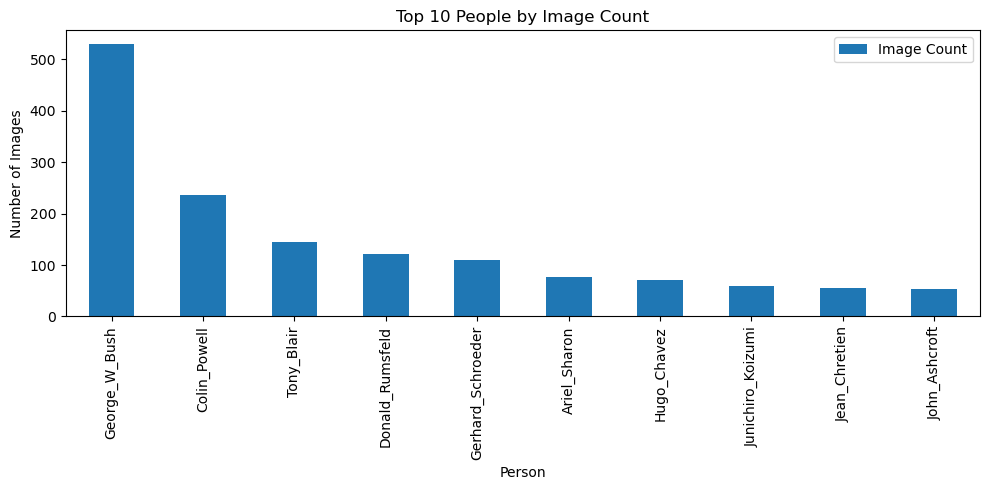

In [35]:
from collections import Counter
import pandas as pd
from PIL import Image

# Total number of images
num_images = len(file_paths)

# Number of unique people (classes)
num_classes = len(target_names)

# Count images per class
counts = Counter(targets)
img_counts = np.array(list(counts.values()))
img_per_person = pd.DataFrame({
    'Person': [target_names[i] for i in counts.keys()],
    'Image Count': img_counts
}).sort_values(by='Image Count', ascending=False)

# Get original image size statistics (just sample 100 to avoid loading everything)
original_sizes = []
for path in file_paths[:100]:
    try:
        img = Image.open(path)
        original_sizes.append(img.size)
    except:
        continue

widths, heights = zip(*original_sizes)
avg_size = (np.mean(widths), np.mean(heights))
min_size = (np.min(widths), np.min(heights))
max_size = (np.max(widths), np.max(heights))

# Display summary
print("🧾 Dataset Summary:")
print(f"- Total images: {num_images}")
print(f"- Total people: {num_classes}")
print(f"- Avg images per person: {np.mean(img_counts):.2f}")
print(f"- Min images per person: {np.min(img_counts)}")
print(f"- Max images per person: {np.max(img_counts)}")
print(f"- Sample image sizes (from first 100):")
print(f"  - Avg: {avg_size}")
print(f"  - Min: {min_size}")
print(f"  - Max: {max_size}")

# Optional: Plot top 10 people by image count
img_per_person.head(10).plot.bar(x='Person', y='Image Count', figsize=(10, 5), title='Top 10 People by Image Count')
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

In [37]:
import cv2
from PIL import Image
import numpy as np
import os

# Preprocessing settings
IMAGE_SIZE = (128, 128)
processed_images = []
original_images = []

for path in file_paths[:100]:  # Limit for speed (adjust if needed)
    try:
        img = Image.open(path).convert('L')         # Convert to grayscale
        original_images.append(np.array(img))       # Keep original for later face detection
        img = img.resize(IMAGE_SIZE)                # Resize
        img = np.asarray(img, dtype=np.float32) / 255.0  # Normalize
        processed_images.append(img)
    except Exception as e:
        print(f"Error processing {path}: {e}")

processed_images = np.array(processed_images)
print("✅ Processed images shape:", processed_images.shape)

✅ Processed images shape: (100, 128, 128)


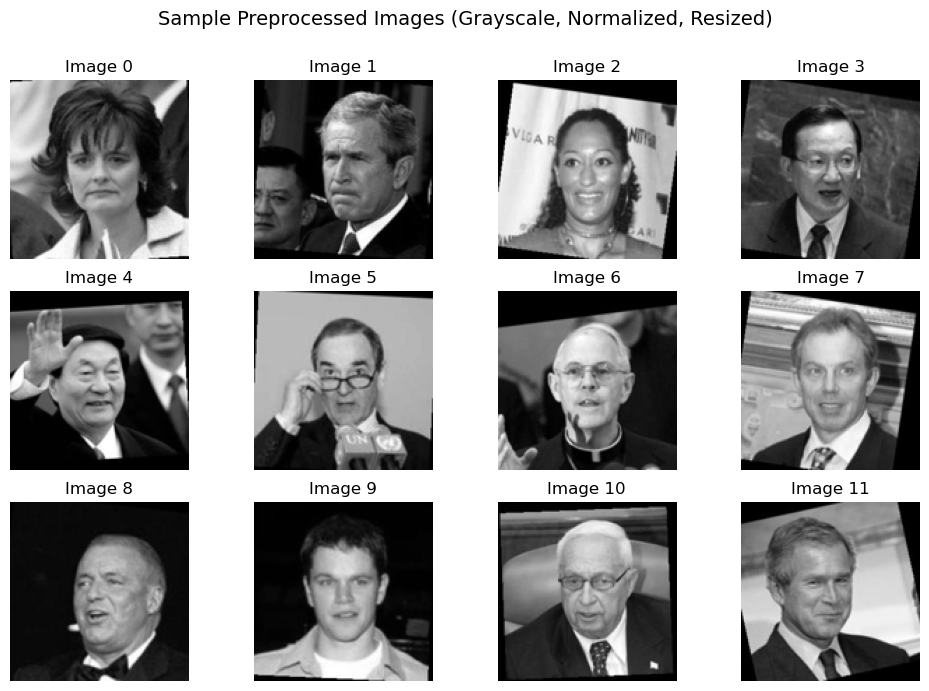

In [39]:
# Show a few preprocessed grayscale images
num_images_to_show = 12
fig, axes = plt.subplots(3, 4, figsize=(10, 7))

for i, ax in enumerate(axes.flat):
    ax.imshow(processed_images[i], cmap='gray')
    ax.set_title(f"Image {i}")
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Sample Preprocessed Images (Grayscale, Normalized, Resized)", fontsize=14)
plt.subplots_adjust(top=0.88)
plt.show()

Записване на класификатор Haarcascades - Frontal face default в променлива face_cascade

In [6]:
#face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascades_frontalface_default.xml')

Засичане на всички лица в изображението и запис на откритите лица в списък faces

In [7]:
#faces = face_cascade.detectMultiScale(gray_image, 1.1,4)

Итериране през списък на откритите лица и очертаване на резултата в правоъгълник.

In [8]:
#for x, y, width, height in faces:
#  cv2.rectangle(gray_image, (x,y), (x + width, y + height), color = (255,0,0), thickness=3)

Визуализиране на краен резултат

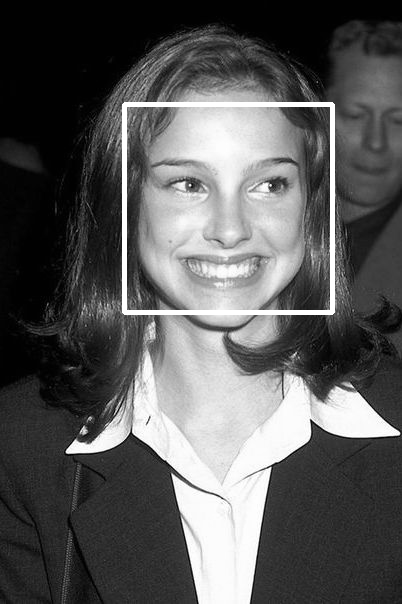

In [9]:
#cv2_imshow(gray_image)